In [62]:
import numpy as np
import matplotlib.pyplot as plt

input_dir = './residuals/'
output_dir = './residuals/'
filename = '06 04 2022 frog 2 LE 15 red flash w2 0_0 P3_P2.txt'
indexes_to_delete1 = [16, 17, 18, 19] # номера неудачных точек (перечислить через запятую, нумерация с 0)
indexes_to_delete2 = [14, 16, 17, 18, 19] # номера неудачных точек (перечислить через запятую, нумерация с 0)

y1 = []
y2 = []
with open(input_dir + filename, 'r', encoding='utf-8') as file:
    line = file.readline()
    while line:
        cols = line.rstrip().replace(',', '.').split('\t')
        y1.append(float(cols[1]))
        y2.append(float(cols[3]))
        line = file.readline()


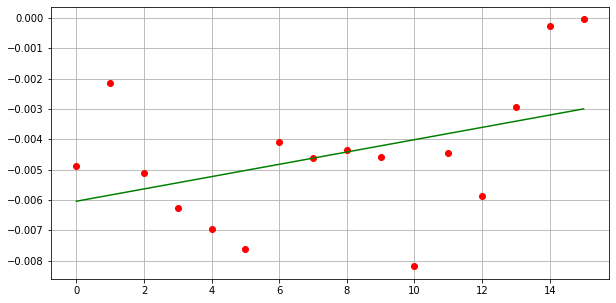

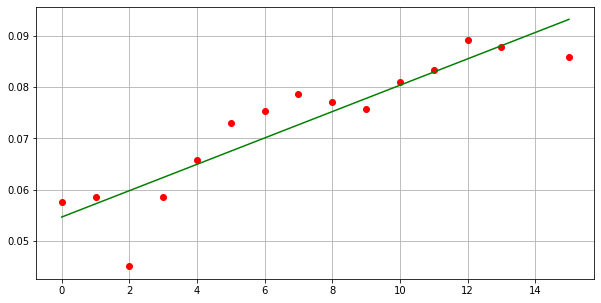

In [63]:
n = len(y1)
x1 = np.linspace(0, n - 1, n)
y1 = np.array(y1)
x1 = np.delete(x1, indexes_to_delete1)
y1 = np.delete(y1, indexes_to_delete1)

x2 = np.linspace(0, n - 1, n)
y2 = np.array(y2)
x2 = np.delete(x2, indexes_to_delete2)
y2 = np.delete(y2, indexes_to_delete2)

s = np.polynomial.polynomial.Polynomial.fit(x1, y1, 1).convert().coef
k, b = s[1], s[0]
trend1 = k * x1 + b
residuals1 = dict()
for i in range(x1.size):
    residuals1[x1[i]] = y1[i] - trend1[i]

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.plot(x1, y1, 'ro')
ax.plot(x1, trend1, 'g')
ax.grid()

s = np.polynomial.polynomial.Polynomial.fit(x2, y2, 1).convert().coef
k, b = s[1], s[0]
trend2 = k * x2 + b
residuals2 = dict()
for i in range(x2.size):
    residuals2[x2[i]] = y2[i] - trend2[i]

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.plot(x2, y2, 'ro')
ax.plot(x2, trend2, 'g')
ax.grid()

In [64]:
with open(output_dir + filename[:-3] + '_out' + '.txt', 'w', encoding='utf-8') as file:
    for i in range(n):
        num1 = f'{residuals1[i]:.5f}' if i in residuals1 else ''
        num2 = f'{residuals2[i]:.5f}' if i in residuals2 else ''
        file.write(f'{i}\t{num1}\t{num2}\n')